In [1]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import spacy
import wordcloud 
from wordcloud import WordCloud
import statistics
from collections import Counter
import datetime
import textblob
from textblob import TextBlob
import sklearn

In [2]:
import os
from google.colab import drive

# Mount google drive
DRIVE_MOUNT='/content/gdrive'
drive.mount(DRIVE_MOUNT)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
# create folder to write data to
CIS545_FOLDER=os.path.join(DRIVE_MOUNT, 'My Drive', 'FYP', 'report', 'ALL', 'traditional ML methods', 'd5')
HOMEWORK_FOLDER=os.path.join(CIS545_FOLDER, 'Project')
os.makedirs(HOMEWORK_FOLDER, exist_ok=True)

In [4]:
fake = pd.read_csv('/content/gdrive/MyDrive/FYP/report/new dataset/fake2.csv')
true = pd.read_csv('/content/gdrive/MyDrive/FYP/report/new dataset/real2.csv')

In [5]:
fake

,title,text,label
0,BOMBSHELL: Trump Lied – His ‘Armada’ Was NOT ...,week trump bellow possible nuclear test north ...,0
1,U.S. Elections “November Chaos”: What You’re N...,grtv fbi s october surprise throw 2016 electio...,0
2,"White House Gives Up Trying To Control Trump,...",presidential campaign donald trump prove loose...,0
3,Snowflake Trump Makes His Staff Create A Dail...,couple week ago donald trump hold cabinet meet...,0
4,NOT-IMPARTIAL DEBATE MODERATOR Martha Raddatz ...,impartial word people know debate moderator ...,0
...,...,...,...
23476,Comment on Facebook Daughter’s Day Hoax Is A S...,subscribe daughter yesterday national daughter...,0
23477,SHERIFF CLARKE On Obama’s Final Days: “Obama’s...,article wow milwaukee s sheriff david clarke n...,0
23478,Rubio Just Kissed His Political Career Goodby...,price s dignity florida senator marco rubio re...,0
23479,"Israel settlements legal, Trump aide says, pla...",politics donald trump republican candidate 201...,0


In [6]:
true

,title,text,label
0,Planned Parenthood President Cecile Richards: ...,thursday comedy central s daily discuss republ...,1
1,Football ’Legend’ Sacked by Manchester United ...,longstanding member staff manchester united wo...,1
2,Governor Cuomo Orders Investigation of Racial ...,gov andrew m cuomo new york announce monday or...,1
3,Egypt extends state of emergency for three mon...,cairo reuters egypt extend state emergency mon...,1
4,"The Best TV Shows and Movies New to Netflix, H...",beginning month subscription streaming service...,1
...,...,...,...
21412,Putin says Russia should scrap profit tax on r...,moscow reuters russia scrap 13 percent profit ...,1
21413,California legislature passes climate change b...,san francisco reuters california lawmaker vote...,1
21414,Kiefer Sutherland Returns. This Time the Oval ...,toronto kiefer sutherland play tour guide set ...,1
21415,U.S. House approves bill to preserve insurance...,washington reuters u s house representatives e...,1


In [7]:
#Create column with labels
fake["label"] = "fake"
true["label"] = "true"

In [8]:
#Check shapes of dataframes. I scraped 1844 articles to add to this dataset.
print (fake.shape)
print (true.shape)

(23481, 3)
(21417, 3)


In [9]:
fake.text=fake.text.astype(str)
true.text=true.text.astype(str)

In [10]:
#Remove articles with only pictures / no text
true = true[true["text"] != ""] 
fake = fake[fake["text"] != ""]

In [11]:
#The datasets are pretty balanced, which is good!
print(fake.shape)
print(true.shape)

(23481, 3)
(21417, 3)


In [12]:
import ipywidgets as widgets
from IPython import display
widget1 = widgets.Output()
widget2 = widgets.Output()

# render in output widgets
with widget1:
    display.display(fake.head(5))
with widget2:
    display.display(true.head(5))

# create HBox
hbox = widgets.HBox([widget1, widget2])

# render hbox
hbox

In [13]:
fake.to_csv('fakeForModeling.csv')
!cp fakeForModeling.csv "/content/gdrive/My Drive/FYP/report/ALL/traditional ML methods/d5/Project"

In [14]:
fake.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23481 entries, 0 to 23480
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   23481 non-null  object
 1   text    23481 non-null  object
 2   label   23481 non-null  object
dtypes: object(3)
memory usage: 733.8+ KB


In [15]:
true.to_csv('trueForModeling.csv')
!cp trueForModeling.csv "/content/gdrive/My Drive/FYP/report/ALL/traditional ML methods/d5/Project"

In [16]:
import string
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
  
from nltk.corpus import stopwords
stop_words = list(stopwords.words('english', 'arabic'))
stop_words.extend(["said", "reuters", "CNN", "would", "image", "via"]) #extend stopwords to include these words too

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
from nltk.stem import WordNetLemmatizer 
  
lemmatizer = WordNetLemmatizer()  

words_in_t = [] #all tokens in true articles
words_in_f = [] #all tokens in fake articles
words_in_each_article_t = [] #list of true articles, each in tokenized form
words_in_each_article_f = [] #list of fake articles, each in tokenized form

def process(df, word_list, by_article_list):
  for article in (df["text"]):
    words = word_tokenize(article)
    words = [word.lower() for word in words if word.isalpha()] #lowercase
    words = [word for word in words if word not in string.punctuation and word not in stop_words] #punctuation, stopwords
    words = [lemmatizer.lemmatize(word) for word in words] #convert word to root form

    by_article_list.append(words)
    for w in words:
      word_list.append(w)

In [18]:
#NOTE: If rerunning, this cell will take a while
process(fake, words_in_f, words_in_each_article_f)

In [19]:
#NOTE: If rerunning, this cell will take a while
process(true, words_in_t, words_in_each_article_t)

In [20]:
from collections import Counter

bigrams_true = zip(words_in_t, words_in_t[1:])
bigram_counts_true = Counter(bigrams_true)
bigrams_true = pd.DataFrame(bigram_counts_true.most_common(20), columns=["Bigram", "Count"])
bigrams_true

,Bigram,Count
0,"(united, state)",14032
1,"(mr, trump)",12732
2,"(donald, trump)",8807
3,"(white, house)",8146
4,"(new, york)",7719
5,"(president, donald)",4627
6,"(north, korea)",4175
7,"(trump, say)",3622
8,"(islamic, state)",3519
9,"(prime, minister)",3374


In [21]:
bigrams_false = zip(words_in_f, words_in_f[1:])
bigram_counts_false = Counter(bigrams_false)
bigrams_false = pd.DataFrame(bigram_counts_false.most_common(20), columns=["Bigram", "Count"])
bigrams_false

,Bigram,Count
0,"(donald, trump)",13143
1,"(hillary, clinton)",10550
2,"(united, state)",7703
3,"(white, house)",6213
4,"(twitter, com)",4770
5,"(new, york)",4537
6,"(pic, twitter)",4462
7,"(president, obama)",3322
8,"(year, old)",3037
9,"(president, trump)",2708


In [22]:
trigrams_true = zip(words_in_t, words_in_t[1:], words_in_t[2:])
trigram_counts_true = Counter(trigrams_true)
trigrams_true = pd.DataFrame(trigram_counts_true.most_common(20), columns=["Trigram", "Count"])
trigrams_true

,Trigram,Count
0,"(president, donald, trump)",4517
1,"(president, barack, obama)",2171
2,"(new, york, time)",1931
3,"(u, president, donald)",1498
4,"(donald, j, trump)",1249
5,"(mr, trump, say)",820
6,"(new, york, city)",799
7,"(george, w, bush)",727
8,"(affordable, care, act)",651
9,"(white, house, say)",630


In [23]:
trigrams_false = zip(words_in_f, words_in_f[1:], words_in_f[2:])
trigram_counts_false = Counter(trigrams_false)
trigrams_false = pd.DataFrame(trigram_counts_false.most_common(20), columns=["Trigram", "Count"])
trigrams_false

,Trigram,Count
0,"(pic, twitter, com)",4441
1,"(new, york, time)",1656
2,"(donald, j, trump)",1475
3,"(j, trump, realdonaldtrump)",1065
4,"(president, united, state)",925
5,"(president, barack, obama)",793
6,"(black, life, matter)",735
7,"(george, w, bush)",667
8,"(fbi, director, james)",659
9,"(director, james, comey)",650


In [24]:
wordcounts_t = Counter(words_in_t)
wordcounts_f = Counter(words_in_f)

In [25]:
mostcommon_t = Counter(wordcounts_t).most_common(20)
mostcommon_f = Counter(wordcounts_f).most_common(20)

t_plot = dict(mostcommon_t)
mostcommon_t = pd.DataFrame(mostcommon_t, columns = ["Word", "Count"])
mostcommon_t = mostcommon_t.reset_index(drop=True)
mostcommon_t = mostcommon_t['Word'].tolist()

f_plot = dict(mostcommon_f)
mostcommon_f = pd.DataFrame(mostcommon_f, columns = ["Word", "Count"])
mostcommon_f = mostcommon_f.reset_index(drop=True)
mostcommon_f = mostcommon_f['Word'].tolist()

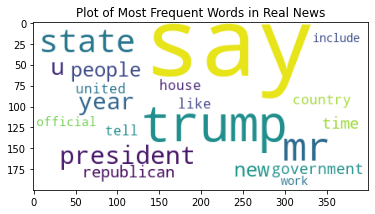

In [26]:
t_wc = WordCloud(max_words=25,relative_scaling=1,background_color ='white', normalize_plurals=False).generate_from_frequencies(t_plot)

plt.imshow(t_wc)
plt.title("Plot of Most Frequent Words in Real News")
plt.show()

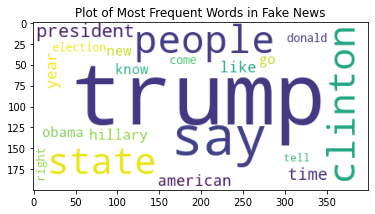

In [27]:
f_wc = WordCloud(max_words=25,relative_scaling=1,background_color ='white', normalize_plurals=False).generate_from_frequencies(f_plot)

plt.imshow(f_wc)
plt.title("Plot of Most Frequent Words in Fake News")
plt.show()

In [28]:
#Of the top 20 words in each class, 9 words are common 
len(set(mostcommon_t) & set(mostcommon_f))

10

In [29]:
#Get tokenized forms of all articles (true and fake) in one dataframe
X = []
for a in words_in_each_article_t:
  X.append(a)
for b in words_in_each_article_f:
  X.append(b)

In [30]:
#Get labels of all articles (true and fake) in one dataframe
y = pd.concat([true["label"], fake["label"]])
y = [1 if x == "fake" else 0 for x in y] #1 and 0 for ease of tokenizing

In [31]:
articles = pd.DataFrame(X)
y = pd.DataFrame(y, columns=["label"])

In [32]:
articles.to_csv('articles.csv')
!cp articles.csv "/content/gdrive/My Drive/FYP/report/ALL/traditional ML methods/d5/Project"

y.to_csv('labels.csv')
!cp labels.csv "/content/gdrive/My Drive/FYP/report/ALL/traditional ML methods/d5/Project"

In [33]:
import sklearn.model_selection as ms

#Create 80-20 train test split
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size = 0.2, random_state=1)

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

#Keep words that appear in greater than 10% of documents. Override preprocessor and implement on list of words
#in each article in order to keep the words we have cleaned for earlier
tfidf = TfidfVectorizer(min_df = 0.1, preprocessor = ' '.join)

#Implement on train dataset
response_train = tfidf.fit_transform(X_train) #This is the Sparse Document-Term Matrix
feature_names_train = tfidf.get_feature_names()
dense_train = response_train.todense() #This is the Dense Document-Term Matrix
denselist_train = dense_train.tolist()

In [35]:
df_train = pd.DataFrame(denselist_train, columns=feature_names_train)
df_train

,able,accord,act,action,actually,add,administration,agency,ago,allow,america,american,announce,appear,area,ask,attack,attempt,away,bad,base,begin,believe,big,bill,break,bring,build,business,call,campaign,candidate,case,cause,center,change,charge,chief,child,city,...,support,supporter,system,take,talk,tell,term,thing,think,thursday,time,today,trump,try,tuesday,turn,twitter,united,use,video,view,vote,voter,want,war,washington,watch,way,wednesday,week,well,white,win,woman,word,work,world,write,year,york
0,0.000000,0.000000,0.000000,0.0,0.000000,0.039918,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.091145,0.051958,0.000000,0.042877,0.000000,0.048383,0.000000,0.046140,0.000000,0.000000,0.043389,0.0,0.0,0.0,0.051989,0.000000,0.000000,0.076190,0.278377,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.091377,...,0.113737,0.00000,0.000000,0.033070,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.036763,0.0,0.000000,0.000000,0.341061,0.104133,0.000000,0.000000,0.038476,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.201970,0.000000,0.049819,0.0,0.000000,0.000000,0.027805,0.00000
1,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.181573,0.207016,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.172873,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.334335,0.000000,0.0,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.131760,0.000000,0.122064,0.000000,0.000000,0.000000,0.0,0.114788,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.169860,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.156160,0.172613,0.000000,0.00000
2,0.187928,0.000000,0.000000,0.0,0.000000,0.048207,0.0,0.0,0.060113,0.000000,0.000000,0.000000,0.0,0.000000,0.125493,0.093553,0.051780,0.000000,0.000000,0.000000,0.000000,0.053450,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.057746,0.000000,0.046005,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.059553,0.331050,...,0.045784,0.06207,0.000000,0.039937,0.102935,0.036998,0.000000,0.000000,0.042943,0.0,0.139170,0.228177,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.041912,0.110774,0.000000,0.0,0.000000,0.000000,0.043818,0.0,0.046895,0.000000,0.162189,0.000000,0.0,0.047332,0.000000,0.067157,0.00000
3,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.126162,0.000000,...,0.000000,0.00000,0.000000,0.084606,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.073708,0.241696,0.504949,0.000000,0.000000,0.000000,0.212069,0.000000,0.0,0.120602,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.120375,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.100273,0.000000,0.142271,0.00000
4,0.000000,0.136573,0.249471,0.0,0.091199,0.072775,0.0,0.0,0.000000,0.080589,0.075621,0.000000,0.0,0.000000,0.094725,0.000000,0.000000,0.000000,0.000000,0.000000,0.084117,0.080690,0.076308,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.069451,0.000000,0.000000,0.09079,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.00000,0.268007,0.060290,0.000000,0.000000,0.000000,0.000000,0.129656,0.0,0.210097,0.000000,0.000000,0.000000,0.000000,0.080536,0.000000,0.000000,0.0,0.000000,0.090804,0.310894,0.094923,0.000000,0.000000,0.070145,0.0,0.000000,0.000000,0.066149,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.142909,0.000000,0.000000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(preprocessor = ' '.join, vocabulary = feature_names_train)

#Implement on test dataset
response_test = tfidf.fit_transform(X_test) #This is the Sparse Document-Term Matrix
feature_names_test = tfidf.get_feature_names()
dense_test = response_test.todense() #This is the Dense Document-Term Matrix
denselist_test = dense_test.tolist()

In [37]:
df_test = pd.DataFrame(denselist_test, columns=feature_names_test)
df_test

,able,accord,act,action,actually,add,administration,agency,ago,allow,america,american,announce,appear,area,ask,attack,attempt,away,bad,base,begin,believe,big,bill,break,bring,build,business,call,campaign,candidate,case,cause,center,change,charge,chief,child,city,...,support,supporter,system,take,talk,tell,term,thing,think,thursday,time,today,trump,try,tuesday,turn,twitter,united,use,video,view,vote,voter,want,war,washington,watch,way,wednesday,week,well,white,win,woman,word,work,world,write,year,york
0,0.0,0.000000,0.000000,0.160988,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.145563,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.125708,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.158522,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.121452,0.0,0.00000,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
1,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.083638,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.103659,0.074365,0.0,0.095713,0.0,0.000000,0.069953,0.0,0.000000,0.188555,0.0,0.0,0.000000,0.000000,0.000000,0.346939,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.110882,0.000000,0.000000,0.000000,0.0,0.00000,0.0,0.21717,0.0,0.0,0.190669,0.000000,0.000000,0.000000
2,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.088927,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.110214,0.000000,0.0,0.000000,0.0,0.121988,0.000000,0.0,0.217615,0.000000,0.0,0.0,0.106152,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.093461,0.0,0.00000,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
3,0.0,0.000000,0.317403,0.000000,0.0,0.000000,0.077154,0.174042,0.175262,0.077338,0.0,0.296293,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.082462,0.0,0.0,0.0,0.0,0.060309,0.0,0.0,0.000000,0.0,0.0,0.145621,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.083620,0.057387,0.000000,0.000000,0.0,0.000000,0.0,0.082730,0.000000,0.0,0.098388,0.000000,0.0,0.0,0.000000,0.000000,0.152429,0.000000,0.000000,0.000000,0.000000,0.060179,0.0,0.067393,0.000000,0.000000,0.080695,0.063384,0.0,0.06738,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.097472,0.000000
4,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.34184,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.341666,0.000000,0.000000,0.000000,0.0,0.00000,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8975,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.116579,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.207308,0.0,0.133409,0.0,0.000000,0.000000,0.0,0.000000,0.262818,0.0,0.0,0.00

In [38]:
#This is the final data to be used for training models
df_train.to_csv('training_data.csv')
!cp training_data.csv "/content/gdrive/My Drive/FYP/report/ALL/traditional ML methods/d5/Project"

In [39]:
#This is the final data to be used for testing models
df_test.to_csv('testing_data.csv')
!cp testing_data.csv "/content/gdrive/My Drive/FYP/report/ALL/traditional ML methods/d5/Project"

In [40]:
y_train = pd.DataFrame(y_train, columns=["label"])
y_test = pd.DataFrame(y_test, columns=["label"])

In [41]:
#Final labels to be used for training models
y_train.to_csv('train_labels.csv')
!cp train_labels.csv "/content/gdrive/My Drive/FYP/report/ALL/traditional ML methods/d5/Project"

In [42]:
#Final labels to be used for testing models
y_test.to_csv('test_labels.csv')
!cp test_labels.csv "/content/gdrive/My Drive/FYP/report/ALL/traditional ML methods/d5/Project"

From medium Getting Real with Fake news